<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DalinaV/blob/main/Actividad7RegresionesyKmeans_A01793258.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*


####**Curso: Ciencia y analítica de datos (Gpo 10)**



#**Actividad Semanal -- 7 Regresiones y K means**


####**Prof.Maria de la Paz Rico**


####**09 de noviembre de 2022**


###**Nombre del estudiante: Dalina Aidee Villa Ocelotl**

###**Matrícula: A01793258**



# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.



- En el aprendizaje supervisado, los datos de entrenamiento introducidos en el algoritmo incluyen las soluciones deseadas, llamadas etiquetas. 
- En la **regresión**, las etiquetas son cantidades continuas.
- Los modelos lineales predicen calculando una suma ponderada de las características de entrada más un término de sesgo.

In [1]:
## importamos algunos paquetes que utilizaremos 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

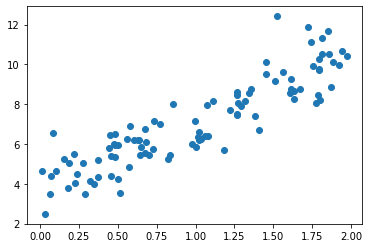

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

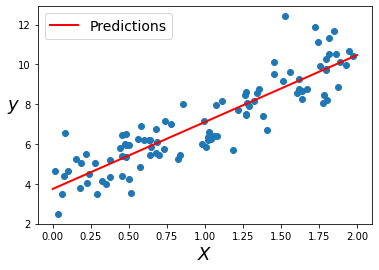

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

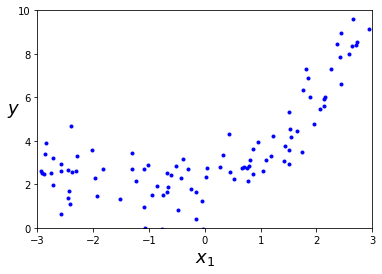

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

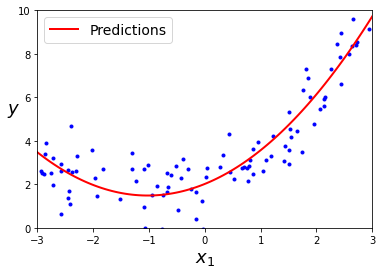

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# **Ejercicio 1**

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

***Objetivo:*** Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.




> **1.1** Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


> **1.2** Regresión Lineal. 
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


> **1.3** Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


> **1.4** Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

> **1.5** Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

> **1.6** Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
 

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


## **1.1** Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


In [27]:
len(X)

1000

In [28]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

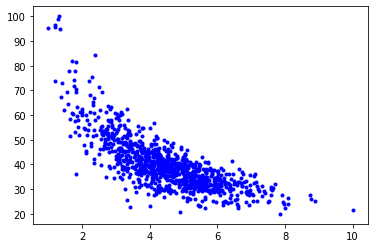

In [29]:
plt.plot(X,y,'b.')


## **1.2 Regresion lineal**
 Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [30]:
#Regresion lineal

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


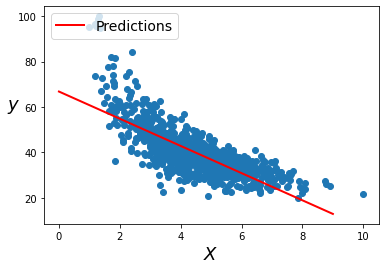

In [31]:
# construct best fit line
X_fit = np.linspace(0, 9, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(66.83650741226988, array([-5.98882699]))

Podemos hacer predicciones usando el método predict de la clase LinearRegression

In [33]:
# obtenemos las predicciones con lso datos del test
lin_reg.predict(X_test)

array([39.33781957, 44.26058238, 49.66953663, 32.79171748, 47.10537261,
       37.98201755, 45.42071108, 36.22515778, 33.5758441 , 41.87191428,
       33.12946768, 23.05091467, 35.07429172, 43.20061834, 38.10564826,
       43.63593586, 49.2554343 , 44.21893763, 55.20004529, 44.83870093,
       30.76611387, 36.61690197, 33.17657165, 34.87833619, 35.29349453,
       46.36166153, 38.96677761, 52.82210512, 41.85260809, 35.26339328,
       54.54553752, 41.78713832, 48.57173789, 38.02261075, 42.41802969,
       28.59633034, 39.01614668, 48.54266737, 30.99728625, 48.69255853,
       41.67367994, 46.85384244, 24.04090657, 44.3749518 , 40.3026443 ,
       48.53462277, 14.24928761, 28.44909769, 37.36510679, 29.93817969,
       30.64777855, 27.71163587, 49.58572564, 41.81131528, 58.57765387,
       52.82625176, 41.24011095, 30.80081126, 48.25938282, 30.13464752,
       42.33522443, 51.3655144 , 33.060437  , 42.85495078, 35.37572884,
       47.40402361, 48.05704533, 30.41861982, 39.89906313, 33.51

In [34]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X_train)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

In [35]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y_train, rcond=1e-6)
theta_best_svd


array([66.83650741, -5.98882699])

In [36]:
np.linalg.pinv(X_b) @ y_train

array([66.83650741, -5.98882699])

In [37]:
X_test
X_test.shape
y_test = linear_reg.predict(X_test)
y_test

linear_reg.intercept_, linear_reg.coef_

(66.83650741226988, array([-5.98882699]))

The model estimates:

$\hat{y} = -5.9X + 66.83$

In [38]:

from sklearn.metrics import mean_squared_error
# Predecimos los valores y para los datos usados en el entrenamiento
y_pred = linear_reg.predict(X_test)
y_pred_1 =y_pred


In [39]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 0.0
Root Mean Squared Error: 0.0
r2_score 1.0


**Comentarios:** Observamos que el modelo no ajusta bien a los datos porque principalmente debe ser un modelo polinomial, ya que en la grafica ajusta mejor una curva que una linea

## **1.3 Regresión Polinomial.**
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [40]:
#polinomial

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly_1 = poly_features.fit_transform(X_test)

In [41]:
X_poly[0]

array([ 7.97424764, 63.58862541])

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

The model estimates:

$\hat{y} = 1.13X^2 - 16.4X + 88.80$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


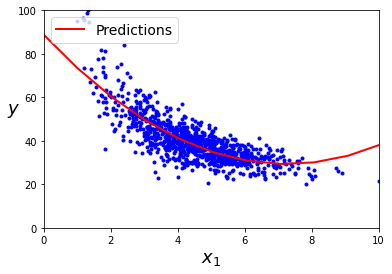

In [43]:
X_new=np.linspace(0, 100, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

**Comentarios:** El modelo parece ajustarse mejor a los puntos lo que nos muestra buenas estimaciones

In [44]:
# Predecimos los valores y para los datos usados en el entrenamiento
y_pred = lin_reg.predict(X_poly_1)
y_pred_2 = y_pred

In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 1.9522094521364572
Root Mean Squared Error: 3.138026878215887
r2_score 0.8594780150351065


## **1.4** Realiza la **regresión con Ridge y Lasso.** 
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

**Regularización**

- Una forma de reducir el sobreajuste es regularizar el modelo (por ejemplo, restringirlo), teniendo menos grados de libertad.

- Por ejemplo en un modelo polinomial: reducir el número de grados del polinomio.

- La regularización de un modelo lineal generalmente se logra restringiendo los pesos del modelo.

Es importante **escalar** los datos antes de realizar **Ridge Regression**:

Los métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores antes de entrenar el modelo.

In [46]:
from sklearn.preprocessing import StandardScaler

poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
scaler = StandardScaler() 
X_poly_scaled = scaler.fit(X_poly) 

In [47]:
# better 
from sklearn.pipeline import Pipeline

model = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [48]:
y_pred = model.predict(X_test)

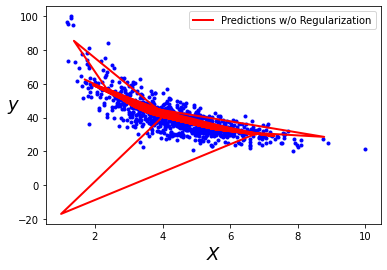

In [49]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [50]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=5, random_state=42, solver='cholesky'))])

In [51]:
y_pred = model_ridge.predict(X_test)
y_pred_3 = y_pred

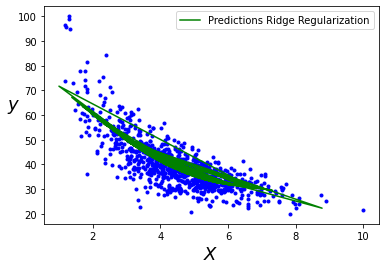

In [52]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 1.8748470913837028
Root Mean Squared Error: 2.633252536081873
r2_score 0.9010499586955597


Es importante escalar los datos antes de realizar la **Regresión Lasso**:

In [54]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 5, random_state = 42))])
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=5, random_state=42))])

In [55]:
y_pred = model_lasso.predict(X_test)
y_pred_4=y_pred

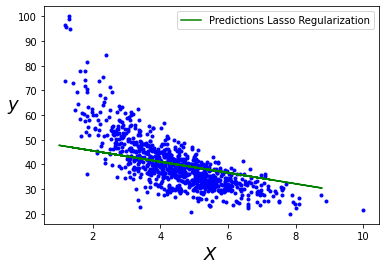

In [56]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [57]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.289168421954118
Root Mean Squared Error: 5.261004628718388
r2_score 0.605026166288049


**Comentarios:** Observamos que no es necesario aplicar la regularizacion, pues basta con la estimacion de la regresion polinomica de grado 2

## **1.5** Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)



In [58]:
# Definamos 4 modelos: el de regresión lineal(RLM); de RLM con 
# regularización L1 (lasso); de RLM con regularización L2 (ridge) y
# regresion polinomica:  

modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(alpha=30)))  
modelos.append(('RIDGE', Ridge(alpha=30)))  
modelos.append(('PR', LinearRegression() ))


yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RL con regularización L1
yhat2 = []   # predicciones del RL con regularización L2
yhat12 = []  # predicciones del RL polinomica


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X, np.ravel(y))
  yhat = mm.predict(X)
  
  print(mm.intercept_)   
  print(mm.coef_)      

  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')
  else:
    yhat12.append(yhat)

LR:
67.03904193389238
[-6.0333683]


LASSO:
40.05299943155
[-0.]


RIDGE:
66.5926854931002
[-5.93357476]


PR:
67.03904193389238
[-6.0333683]


In [59]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('RL Error medio Absoluto (MAE) RL:', metrics.mean_absolute_error(y_test, y_pred_1))
print('RL Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
print('RL r2_score',r2_score(y_test, y_pred_1))

print('\n')
print('RL Polinomial Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_2))
print('RL Polinomial Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('RL Polinomial r2_score',r2_score(y_test, y_pred_2))

print('\n')
print('RL L1 RIDGE Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_3))
print('RL L1 RIDGE Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))
print('RL L1 RIDGE r2_score',r2_score(y_test, y_pred_3))

print('\n')
print('RL L2 LASSO Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_4))
print('RL L2 LASSO Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))
print('RL L2 LASSO r2_score',r2_score(y_test, y_pred_4))

RL Error medio Absoluto (MAE) RL: 0.0
RL Root Mean Squared Error: 0.0
RL r2_score 1.0


RL Polinomial Error medio Absoluto (MAE): 1.9522094521364572
RL Polinomial Root Mean Squared Error: 3.138026878215887
RL Polinomial r2_score 0.8594780150351065


RL L1 RIDGE Error medio Absoluto (MAE): 1.8748470913837028
RL L1 RIDGE Root Mean Squared Error: 2.633252536081873
RL L1 RIDGE r2_score 0.9010499586955597


RL L2 LASSO Error medio Absoluto (MAE): 4.289168421954118
RL L2 LASSO Root Mean Squared Error: 5.261004628718388
RL L2 LASSO r2_score 0.605026166288049


**Comentarios:** Se observa que e mejor comportamiento de la prediccion es para la regresion polinomial

## **1.6** Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

El mejorresultado obtenido y que conviene mas a la empresa es la que genere mayor rentabilidad, sin embargo de acuerdo al modelo de datos se observa que el mejor es la regresion polinomica ya que es de acuerdo al ajuste de los datos.

The model estimates:

$\hat{y} = 1.13X^2 - 16.4X + 88.80$

Como es una funcion de costo se observa que su naturaleza es una funcion cuadratica, donde a mayor costo de produccion se asocia un menor numero de ventas. Por lo que la recoemndacion es que entre as produccion genere el costo de esa misma produccion disminuye aunuqe el costo base es decir el intercepto es de 88.80 como base,  indicando que el costo fijo por unidad se va reduciendo a medida que aumentamos el número de unidades del producto.

De acuerdo a los resultados del modelo con 65% como resultado del R-cuadrada observamos que puede predecir bien y puede ser confiable aunque puede recalibrarse y mejorarse. Por lo que se concluye que es buena la prediccion. Ahora dada la naturaleza de la variable que teniamos que explicar basto con enfocar mas a datos de train. 


## **Referencias Bibliograficas Ejercicio 1**

> Regularización Ridge, Lasso y Elastic Net con Python. (s/f). Cienciadedatos.
net. Recuperado el 9 de noviembre de 2022, de https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

> COSTO DE PRODUCCION. (s/f). Angelfire.com. Recuperado el 10 de noviembre de 2022, de https://www.angelfire.com/bc3/valle/capitulo6.htm

#Ejercicio 2

Encuentra el mejor regresor para los datos de las casas:

> **2.1** Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

> **2.2** Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

> **2.3** Regresión Múltiple Polinomial.
Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

> **2.4** Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

> **2.5** Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
> ** 2.6** Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones


Realiza la regresión polinomial de los siguientes datos:

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [62]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [63]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


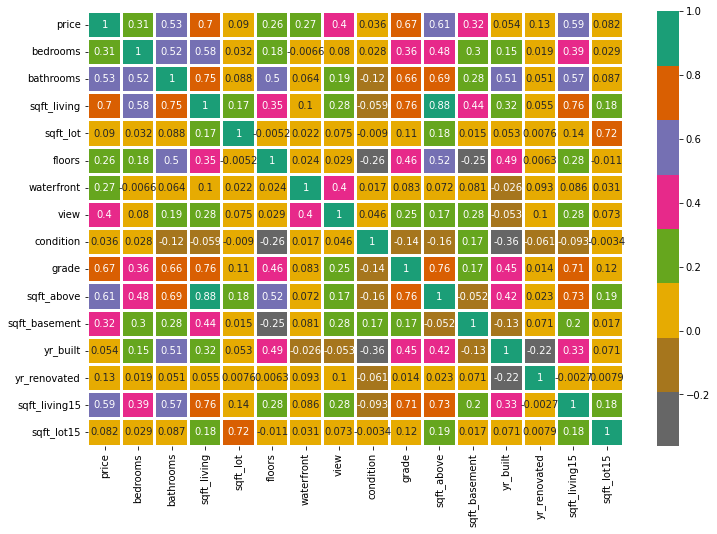

In [64]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [65]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

## **2.1** Divide los datos del costo de manufactura. Utiliza la función train_test_split 

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


In [67]:
#tu codigo aquí

##  **2.2** Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.



In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [69]:
#Se escalan todos los datos
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

In [70]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [71]:
	#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()


In [72]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [73]:
	#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
				

In [175]:
print('RL Error medio Absoluto (MAE) RL:', metrics.mean_absolute_error(y_test, y_pred))
print('RL Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RL r2_score',r2_score(y_test, y_pred))

RL Error medio Absoluto (MAE) RL: 142954.04580152672
RL Root Mean Squared Error: 221199.56654317866
RL r2_score 0.6413639016351438


In [74]:
from sklearn.linear_model import LogisticRegression

#log_reg = LogisticRegression(C= 1.0, penalty='l2', random_state = 42)
#log_reg.fit(X_train, y_train)

## **2.3** Regresión Múltiple Polinomial.
Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.



## **2.4** Realiza la regresión con Ridge y Lasso.
 Incluye la ecuación de tu modelo, errores y r cuadrada.



## **2.5** Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)


## ** 2.6** Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones

El mejor algoritmo que se observa es la regresion logistica ya que permite determinar de mejor manera la clasificacion

# **Ejercicio 3**

![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [76]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 48.3 MB/s 
     |████████████████████████████████| 1.0 MB 51.5 MB/s 
     |████████████████████████████████| 1.7 MB 58.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 66.1 MB/s 
     |████████████████████████████████| 6.3 MB 47.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=357c40cbd4ff5a31ae08f1ce6092bbfa9ed4f6ca1f1c0d54fb3da4d3cff74bb4
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=7d1e773bc8477719ddada7642c9f0b0223c7cf3d07ca428cd6398ba8a1e011f7
  Stored in directory: /root/

In [77]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [145]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [159]:

df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         1839 non-null   object  
 1   latitude     1839 non-null   float64 
 2   longitude    1839 non-null   float64 
 3   address      1839 non-null   object  
 4   phone        1839 non-null   object  
 5   website      1839 non-null   object  
 6   Coordinates  1839 non-null   geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 100.7+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [161]:
latlong=df[["latitude","longitude"]]

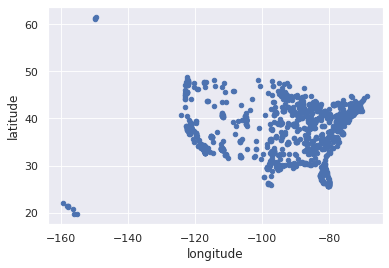

In [162]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [163]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [164]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [172]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [173]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()
gdf1=gdf
gdf.describe()


,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [174]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [154]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

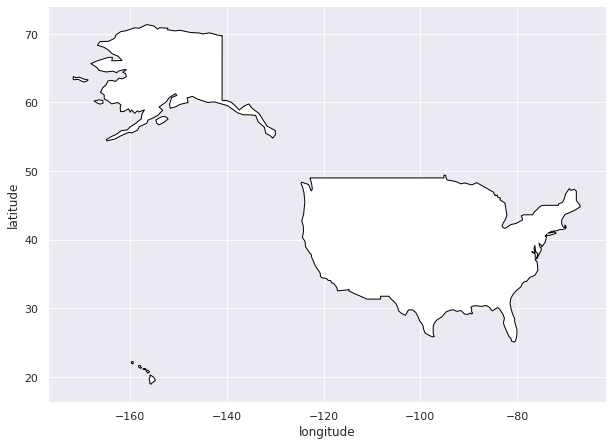

In [155]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

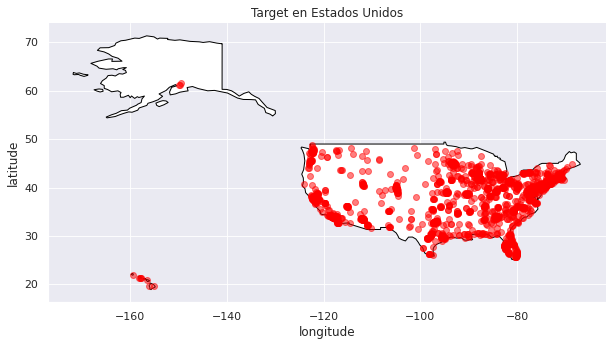

In [156]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [171]:
df1=pd.merge(df,world,left_on='name',right_on='name')
df1.describe()

,latitude,longitude,pop_est,gdp_md_est
count,4.000000,4.000000,4.000000e+00,4.00000
mean,42.231423,-79.791958,1.099164e+07,183148.25000
std,1.035219,7.640504,1.414683e+07,199600.79861
min,41.311369,-89.129358,5.771300e+04,2173.00000
25%,41.349387,-83.428157,1.592219e+06,22683.25000
50%,42.205790,-79.609988,6.436099e+06,160010.00000
75%,43.087826,-75.973789,1.583552e+07,320475.00000
max,43.202741,-70.818499,3.103666e+07,410400.00000


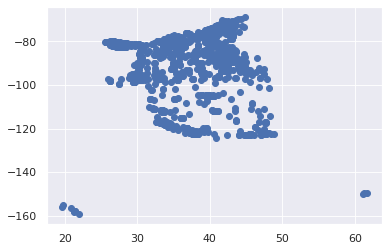

In [140]:
#Graficar los nodos dados (ubicaciones)
Lat= latlong["latitude"]
Lon = latlong["longitude"]
Peso = df['pop_est']
X = []
for i in range(len(latlong["latitude"])):
    X.append(Lat[i])
    X.append(Lon[i])

X = np.array(X)

X = X.reshape(-1, 2,)


plt.scatter(Lat, Lon)
plt.show()

In [176]:
#Ejecutar el algoritmo KMeans
clusters = 5
KMean = KMeans(n_clusters=clusters)
KMean_g = KMean.fit_predict(X)
KMean.fit(X)

KMeans(n_clusters=5)

In [177]:
#Determinar los centroides de cada clúster
KMean.cluster_centers_

array([[  37.57977424, -119.17634307],
       [  31.15654549,  -82.9746348 ],
       [  33.76667154,  -98.58663793],
       [  41.71273365,  -88.92760283],
       [  40.34460877,  -75.66614111]])

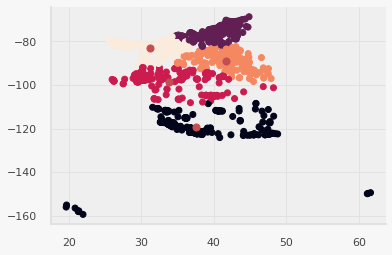

In [178]:
#Graficar todas las coordenadas (Puntos y centroides)
plt.scatter(X[:,0], X[:,1], c=KMean_g) #Puntos iniciales

#Centroides
plt.scatter(KMean.cluster_centers_[0][0], KMean.cluster_centers_[0][1], s=50, c='r')
plt.scatter(KMean.cluster_centers_[1][0], KMean.cluster_centers_[1][1], s=50, c='r')
plt.scatter(KMean.cluster_centers_[2][0], KMean.cluster_centers_[2][1], s=50, c='r')
plt.scatter(KMean.cluster_centers_[3][0], KMean.cluster_centers_[3][1], s=50, c='r')

In [179]:
#Ejecutar el algoritmo KMeans (Considerando el peso de los nodos)
clusters = 4
KMean = KMeans(n_clusters=clusters)
KMean_g = KMean.fit_predict(X)
#KMean.fit(X, sample_weight= df['pop_est'])

In [180]:
#Determinar los centroides de cada clúster
KMean.cluster_centers_

array([[  40.53551408,  -76.72577314],
       [  37.47251917, -118.72268689],
       [  31.98789155,  -83.25770621],
       [  38.47857334,  -93.81115042]])

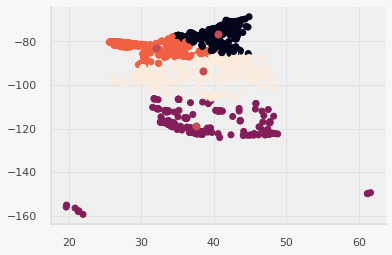

In [181]:
#Graficar todas las coordenadas (Puntos y centroides)
plt.scatter(X[:,0], X[:,1], c=KMean_g) #Puntos iniciales

#Centroides
plt.scatter(KMean.cluster_centers_[0][0], KMean.cluster_centers_[0][1], s=50, c='r')
plt.scatter(KMean.cluster_centers_[1][0], KMean.cluster_centers_[1][1], s=50, c='r')
plt.scatter(KMean.cluster_centers_[2][0], KMean.cluster_centers_[2][1], s=50, c='r')
plt.scatter(KMean.cluster_centers_[3][0], KMean.cluster_centers_[3][1], s=50, c='r')

In [182]:
KMean.labels_

array([2, 2, 2, ..., 3, 3, 1], dtype=int32)

In [183]:
sample_test=np.array([-3.433,-76.22])
second_test=sample_test.reshape(1, -1)
KMean.predict(second_test)

array([2], dtype=int32)

In [185]:
import folium
import statistics
from folium.plugins import HeatMap
mediaLong = statistics.mean(Lon)
mediaLat = statistics.mean(Lat)

# Crear un objeto de mapa base Map()
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 13)

# Crear una capa de mapa de calor
mapa_calor = HeatMap( list(zip(Lat, Lon, df['pop_est'])),
                   min_opacity=0.2,
                   max_val=df["Peso"].max(),
                   radius=50, 
                   blur=50, 
                   max_zoom=1)

#Creamos el marcador de Centro de Gravedad
tooltip = 'Centro de gravedad'
folium.Marker([KMean.cluster_centers_[0][0], KMean.cluster_centers_[0][1]], popup="Centro", tooltip = tooltip).add_to(mapa)
folium.Marker([KMean.cluster_centers_[1][0], KMean.cluster_centers_[1][1]], popup="Centro", tooltip = tooltip).add_to(mapa)
folium.Marker([KMean.cluster_centers_[2][0], KMean.cluster_centers_[2][1]], popup="Centro", tooltip = tooltip).add_to(mapa)
folium.Marker([KMean.cluster_centers_[3][0], KMean.cluster_centers_[3][1]], popup="Centro", tooltip = tooltip).add_to(mapa)

# Adherimos la capa de mapa de calor al mapa principal
mapa_calor.add_to(mapa)
mapa

KeyError: ignored

visualmente puede observarse cómo, básicamente los centroides se ubican en lo que podría considerarse el medio de cada clúster

In [115]:

#X = np.array(latlong["latitude"])
#y = np.array(latlong["longitude"])
#X.shape
#y.shape

(1839,)

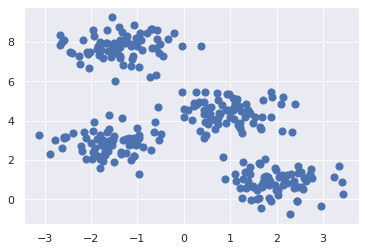

In [106]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ValueError: ignored

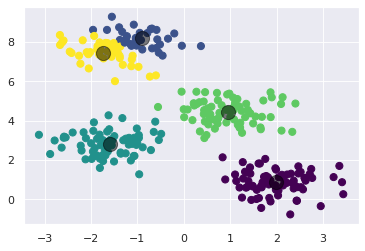

In [110]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

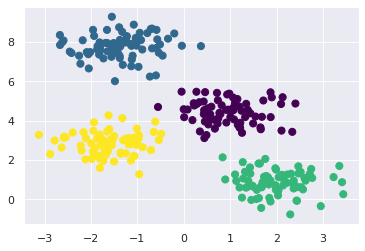

In [111]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


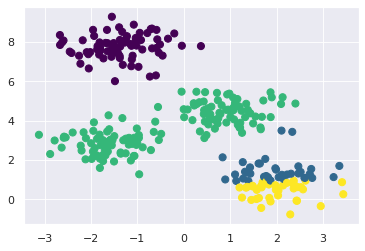

In [103]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

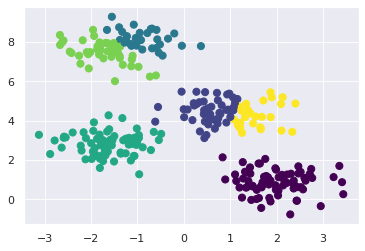

In [104]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Referencias;

